120.00339841842651


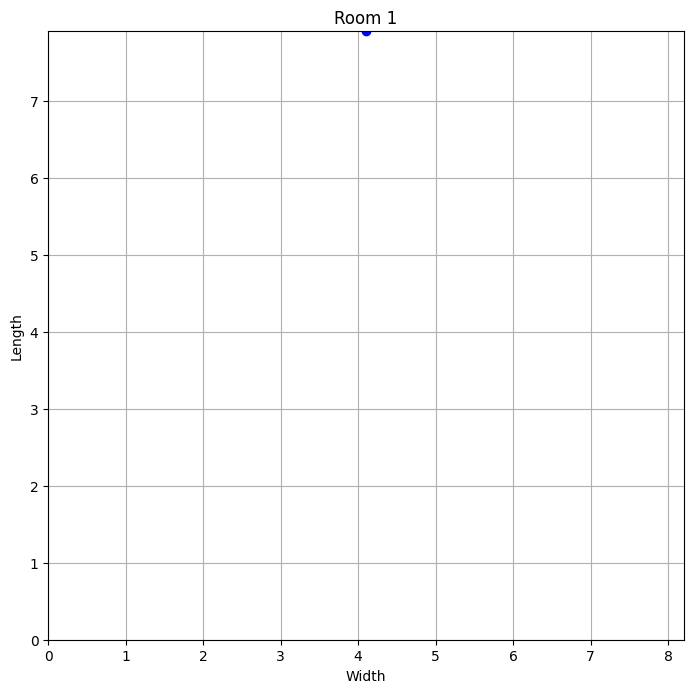

[1702155030.3436773, '(4.1, 7.9), Sound, 22.8311']
[1702155031.3701472, '(4.1, 7.9), Sound, 22.8311']
[1702155046.2252805, '(4.1, 7.9), Sound, 23.76739']
[1702155057.1730998, '(3.6, 4.1), Vibration, 21.42667']
[1702155058.6115727, '(3.6, 4.1), Vibration, 22.8311']
[1702155060.5569167, '(3.6, 4.1), Vibration, 23.29928']
[1702155061.7727988, '(3.6, 4.1), Vibration, 23.29928']
[1702155062.6168797, '(3.6, 4.1), Vibration, 23.29928']


In [ ]:
from IPython.display import clear_output
import paho.mqtt.client as mqtt
import time
import matplotlib.pyplot as plt

# Callback when the client connects to the MQTT broker
def on_connect(client, userdata, flags, rc):
    print(f'Connected with result code {rc}')
    # Subscribe to the topic where Pico W is publishing data
    client.subscribe('Ademtaiyr/feeds/welcome-feed')

# Callback when a new message is received from the MQTT broker
timestamp = time.time()
x_coor = []
y_coor = []

# Every time a message (positive signal) is received, X and Y coordinate of sensor are extracted and 
# stored in a list
def on_message(client, userdata, msg):
    global x_coor
    global y_coor
    global timestamp
    message = msg.payload.decode()
    print([time.time(), message])
    x = [float(message[1:4])]
    y = [float(message[6:9])]
    x_coor.append(x)
    y_coor.append(y)

# Set the MQTT broker details
mqtt_server = 'io.adafruit.com'
mqtt_port = 1883
mqtt_user = 'Ademtaiyr'
mqtt_password = 'aio_isMT98jVUPgtuDfcc2jiqQeYoLvt'

# Create an MQTT client instance
client = mqtt.Client()

# Set the callbacks
client.on_connect = on_connect
client.on_message = on_message

# Set the username and password for the MQTT broker
client.username_pw_set(mqtt_user, mqtt_password)

# Connect to the MQTT broker
client.connect(mqtt_server, mqtt_port, 60)

# Start the MQTT loop to listen for messages
client.loop_start()

room_name = "Room 1"
room_width = 8.2
room_length = 7.9
# Keep calling on_message for 2 minutes (120 seconds)
while True:
    time.sleep(0.01)
    # Once 120 seconds are reached, plot the occupancy map and dump old coordinates
    if time.time() - timestamp > 120:
        clear_output(wait=True)
        print(time.time() - timestamp)
        plt.figure(figsize=(room_width, room_length))
        plt.scatter(x_coor, y_coor, marker='o', color='blue')
        plt.xlim(0, room_width)
        plt.ylim(0, room_length)
        plt.xlabel('Width')
        plt.ylabel('Length')
        plt.title(room_name)
        plt.grid(True)
        plt.show()
        x_coor = []
        y_coor = []
        timestamp = time.time()